<center><img src="https://i.imgur.com/hv1oPnr.jpg"></center>

<br>

<center><h1>🎦 Movies analysis with FilmTV dataset</h1></center>

# <a id='0'>Notebook Content</a>

### - <a href='#1'>1. Introduction</a>
### - <a href='#2'>2. Dataset</a>
### - <a href='#3'>3. Exploratory Data Analysis</a>
#### &ensp; - <a href='#31'>3.1. Top Movies</a>
#### &ensp; - <a href='#32'>3.2. Genres</a>
#### &ensp; - <a href='#33'>3.3. Duration</a>
#### &ensp; - <a href='#34'>3.4. Countries</a>
### - <a href='#4'>4. Key Findings</a>

# <a id='1'>1. Introduction</a>&ensp;&ensp;&ensp;<a href='#0'>↑</a>

<div class="alert alert-block alert-info" style="font-size:14px; line-height: 1.7em">
<p>🎯 <b>Goals</b>:
<li>Generic visualization of most common movies</li>
<li>Investigating the main characteristics that make some movies more rated than others</li>
</p>
<br>
<p>🔨 <b>Tools</b>:
<li><i>numpy</i> and <i>pandas</i> for data manipulation</li>
<li><i>missingno</i> to display the missing data in the FilmTV dataset</li>
<li><i>seaborn</i>, <i>plotly</i>, and <i>WordCloud</i> for data visualization</li>
</p>
</div>

FilmTV is the most popular Italian website with movies data.

The purpose of this notebook is to analyse the FilmTV dataset available at this [Kaggle link](https://www.kaggle.com/stefanoleone992/filmtv-movies-dataset), which provide information regarding movie aspects such as genre, year of release, country name, director and actor names, duration, average rating, total votes, and the descriptions and notes translated from Italian to English with *TextBlob*.

Once the dataset is read with *pandas* and the missing data gets displayed with the *missingno* library, the most popular movies are filtered and displayed to see the comparison from one to another.

The next step is the analysis of the whole dataset, focusing on the genre, duration, and country fields.

Key findings are summarized at the end of this notebook.

# <a id='2'>2. Dataset</a>&ensp;&ensp;&ensp;<a href='#0'>↑</a>

<div class="alert alert-block alert-info" style="font-size:14px; line-height: 1.7em">
<p>⚠️ <b>Warnings</b>:
<li>All string fields besides 'title' have been translated using the <i>TextBlob</i> Python library during the cleaning process, which has been carried out before loading the data on Kaggle</li>
<li>The fields 'humor', 'rhythm', 'effort', 'tension', and 'erotism' are not completely reliable as FilmTV does not always assign a value for each category, but the website still shows them anyway. For this reason, it is not possible to know whether a value of 0 actually means 0 or NaN, and therefore these fields above have not been included in the analysis</li>
</p>
</div>

Reading the dataset using the *pandas* library and displaying the first 5 records.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import math
import re
import requests
from lxml import html
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

movies_df = pd.read_csv('../input/filmtv-movies-dataset/filmtv_movies.csv')
movies_df.head(5)

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.7,6.00,5.0,10,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


Visualizing the columns with missing values using the *missingno* library.

<i>The main fields with missing data are 'notes', 'critics_vote', 'actors', and 'description'.</i>

genre              94
country            10
directors          34
actors           2127
critics_vote     4672
public_vote       194
description      1514
notes           22506


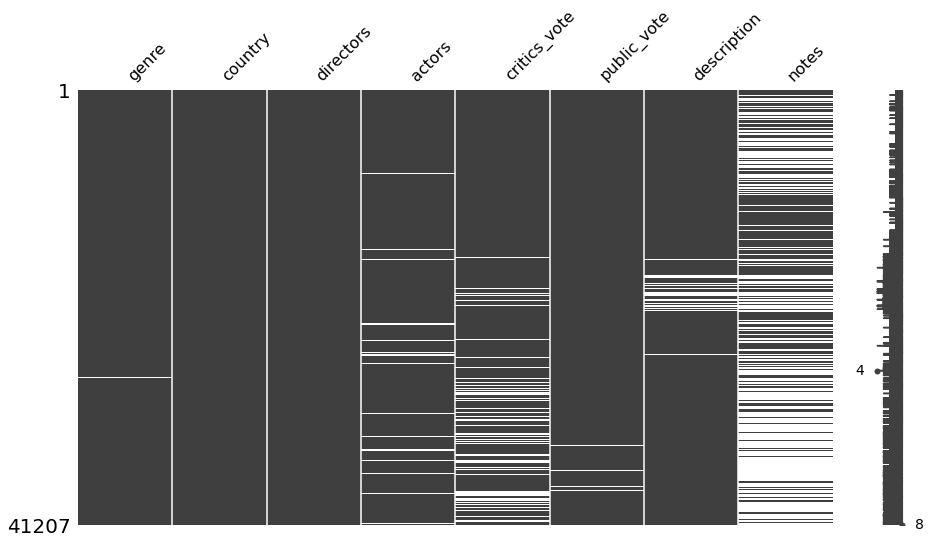

In [2]:
null_values_series = movies_df.isnull().sum().where(lambda x : x > 0).dropna().astype('Int32')
print(null_values_series.to_string()) # to_string() removes the name and dtype from the output
msno.matrix(movies_df[null_values_series.index.tolist()], figsize=(15, 8));

How does the movie reputation (i.e. 'total_votes') affect the n. of missing values?

The following graph shows the impact of each field with missing data in comparison with the total records after the 'total_votes' column is used to filter the dataset.

<i>By filtering only the movies with at least 10 votes, the number of NAs is drastically reduced; the only exception is the 'notes' field, which appears to have blank values regardless of the movie reputation.</i>

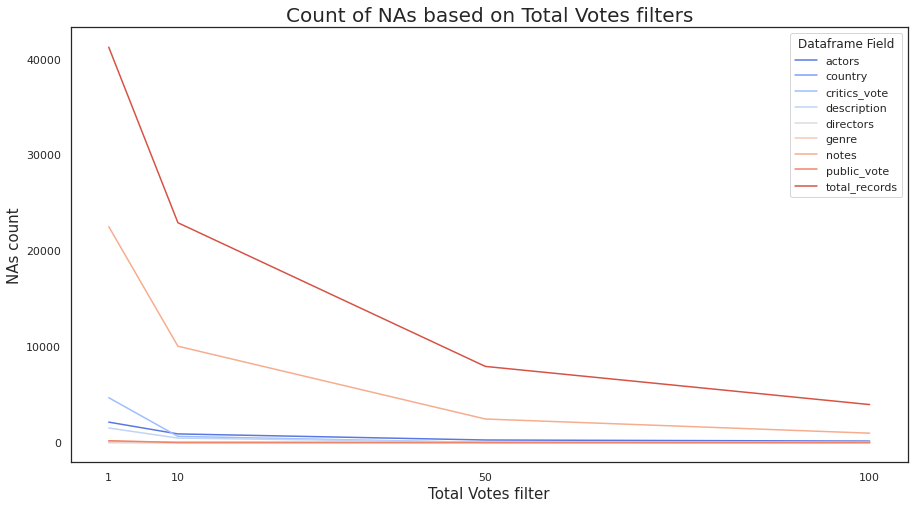

In [3]:
def calculation_of_field_impact_on_nas(df, field_name, filter_values_list):
    nas_list_of_lists = []
    for filter_value in filter_values_list:
        filtered_df = df[df[field_name] >= filter_value]
        nas_list_of_lists.append([filter_value] + filtered_df[null_values_series.index.tolist()].isnull().sum().tolist() + [len(filtered_df)])
    nas_df_cols = ['filter_value'] + null_values_series.index.tolist() + ['total_records']
    return pd.DataFrame(data=nas_list_of_lists, columns=nas_df_cols).melt(id_vars=['filter_value'],
                                                                          value_vars=null_values_series.index.tolist() + ['total_records'],
                                                                          var_name='field_name', value_name='nas').sort_values(by=['filter_value', 'field_name'])


total_votes_filters = [1, 10, 50, 100]
nas_df = calculation_of_field_impact_on_nas(df=movies_df, field_name='total_votes', filter_values_list=total_votes_filters)

# Count of NA values based on total_votes filters
sns.set(style='white')

plt.figure(figsize=(15, 8))
plt.title('Count of NAs based on Total Votes filters', size=20)
ax = sns.lineplot(data=nas_df, x='filter_value', y='nas', hue='field_name', palette='coolwarm')
ax.legend(title='Dataframe Field', labels=sorted(null_values_series.index.tolist()) + ['total_records'])
plt.xlabel('Total Votes filter', size=15)
plt.ylabel('NAs count', size=15)
plt.xticks(total_votes_filters)
plt.show()

# <a id='3'>3. Exploratory Data Analysis</a>&ensp;&ensp;&ensp;<a href='#0'>↑</a>

## <a id='31'>3.1. Top Movies</a>&ensp;&ensp;&ensp;<a href='#0'>↑</a>

Displaying the titles of top 20 movies based on the 'total_votes' field.

<i>The most popular ones are 'Pulp Fiction' and 'The Shining', which obtained a mean rating of at least 9/10.</i>
<br>
<i>The movies with the lowest ratings are 'Inception' and 'Avatar', which received also less votes overall than 'Pulp Fiction' and 'The Shining'.</i>

In [4]:
top20_movies_df = movies_df.sort_values(by='total_votes', ascending=False)[:20]

# Bubble plot with the relationship between total_votes and avg_vote for the 20 most voted movies
fig = go.Figure(data=go.Scatter(x=top20_movies_df['total_votes'], y=top20_movies_df['avg_vote'],
                                mode='markers+text', marker=dict(size=top20_movies_df['avg_vote']**1.5, color=top20_movies_df['avg_vote']),
                                text=top20_movies_df['title'], textposition='top center', textfont=dict(size=9),
                                customdata=top20_movies_df['country'],
                                hoverlabel=dict(namelength=0), # removes the trace number off to the side of the tooltip box
                                hovertemplate='%{text}:<br>%{customdata}<br>%{x:.0f} votes<br>%{y:.1f} mean rating'))
fig.update_layout(title='Mean Rating and Total Votes of the 20 most popular movies', template='plotly_white',
                  title_x=0.5, legend=dict(yanchor='bottom', y=-0.15, xanchor='left', x=0, font=dict(size=10), orientation='h'),
                  autosize=False, width=800, height=500)
fig['layout']['xaxis']['title'] = 'Total Votes'
fig['layout']['yaxis']['title'] = 'Mean Rating'
fig.show()

Displaying the distribution of genres of top 100 movies based on the 'total_votes' field.

<i>There is no genre that is particularly frequent in the top 100 movies, although Dramas and Fantasy are the ones most common in the top 20 list.</i>

In [5]:
top100_movies_df = movies_df.sort_values(by='total_votes', ascending=False)[:100]

fig = px.scatter(top100_movies_df, x='total_votes', y='avg_vote', color='genre',
                 size='total_votes', hover_data=['title'])
fig.update_layout(title='Mean Rating and Total Votes colored by Genre for the the 100 most popular movies', template='plotly_white',
                  title_x=0.5, legend=dict(yanchor='bottom', y=-0.15, xanchor='left', x=0, font=dict(size=10), orientation='h'),
                  autosize=False, width=800, height=500)
fig['layout']['xaxis']['title'] = 'Total Votes'
fig['layout']['yaxis']['title'] = 'Mean Rating'
fig.show()

Plotting an histogram with the count of top 100 movies by decade of release.

<i>The highest frequency of the 2000-10 decade is evident, but what is remarkable is that the previous decade (1990-2000) had several more popular movies than the following one (2010-20).</i>
<br>
<i>It also worth to notice that there is no movie in the top 100 list that has been released from the beginning of the year 2020, which was not obvious given that the FilmTV dataset was scraped on 2021-09-10.</i>
<br>
<i>Another clear information from the following plot is that the mean rating of the top 100 movie descreased decade after decade, with the most evident drop in perceived quality occured in the 2000-10 decade.</i>

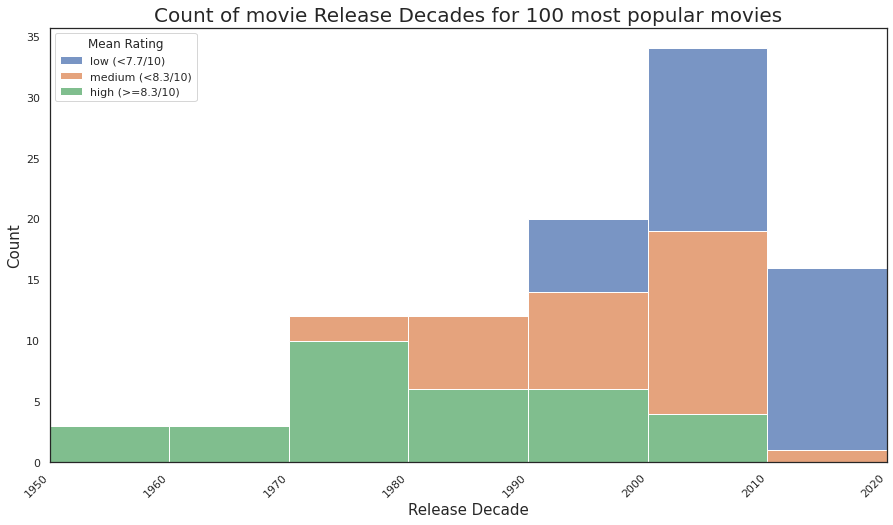

In [6]:
# create three main categories of mean rating
top100_movies_df['mean_rating_qcut'], qcut_mean_ratings = pd.qcut(x=top100_movies_df['avg_vote'], q=3, retbins=True)
mean_rating_labels = ['low (<' + str(qcut_mean_ratings[1]) + '/10)',
                   'medium (<' + str(qcut_mean_ratings[2]) + '/10)',
                   'high (>=' + str(qcut_mean_ratings[2]) + '/10)']
top100_movies_df['mean_rating_qcut'] = pd.qcut(x=top100_movies_df['avg_vote'], q=3, labels=mean_rating_labels)

# find decade of top100_movies_df
top100_movies_df['decade'] = (top100_movies_df['year']//10)*10
n_bins = int(((top100_movies_df['decade'].max()-top100_movies_df['decade'].min())/10)+1)

# Count of movies release year
sns.set(style='white')

plt.figure(figsize=(15, 8))
plt.title('Count of movie Release Decades for 100 most popular movies', size=20)
ax = sns.histplot(data=top100_movies_df.sort_values(by='mean_rating_qcut', ascending=True), x='decade', stat='count', hue='mean_rating_qcut', multiple='stack',
                  bins=n_bins, binrange=(top100_movies_df['decade'].min(), top100_movies_df['decade'].max()+10))
ax.margins(x=0)
ax.legend_.set_title('Mean Rating') # setting only the legend title, without specifying the labels (somehow seaborn kept inverting the labels order in the usual legend setup)
plt.xlabel('Release Decade', size=15)
plt.ylabel('Count', size=15)
plt.xticks(np.arange(top100_movies_df['decade'].min(), top100_movies_df['decade'].max()+20, step=10), rotation=45, ha='right')
plt.show()

Visualizing the relationship between the number of actors in the top 100 movies and the mean rating expressed on FilmTV.

<i>Movies with medium number of actors (between 8 and 11) have a slightly lower mean rating and their rating distribution is the lowest one among the top 100 movies.</i>
<br>
<i>The two outliers are 'War of the Worlds' and '300', and belong to the low and medium categories respectively.</i>

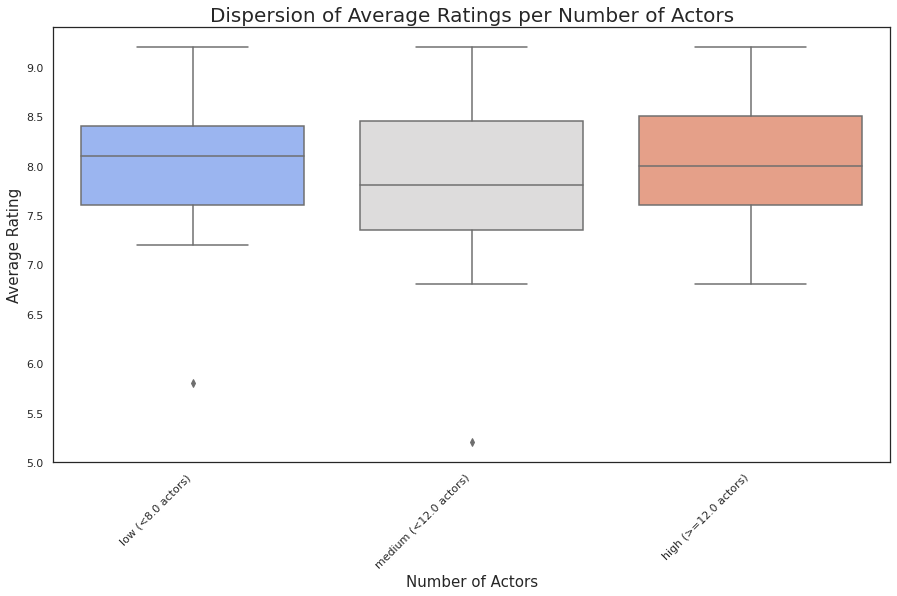

In [7]:
# create three main categories of n. actors
top100_movies_df['number_actors'] = [len(x.split(',')) for x in top100_movies_df['actors']]
top100_movies_df['number_actors_qcut'], qcut_mean_ratings = pd.qcut(x=top100_movies_df['number_actors'], q=3, retbins=True)
mean_rating_labels = ['low (<' + str(qcut_mean_ratings[1]) + ' actors)',
                   'medium (<' + str(qcut_mean_ratings[2]) + ' actors)',
                   'high (>=' + str(qcut_mean_ratings[2]) + ' actors)']
top100_movies_df['number_actors_qcut'] = pd.qcut(x=top100_movies_df['number_actors'], q=3, labels=mean_rating_labels)

# Dispersion of average ratings based on the genre
sns.set(style='white')
plt.figure(figsize=(15, 8))
plt.title('Dispersion of Average Ratings per Number of Actors', fontsize=20)
ax = sns.boxplot(data=top100_movies_df, x='number_actors_qcut', y='avg_vote', palette='coolwarm')
plt.xlabel('Number of Actors', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

## <a id='32'>3.2. Genres</a>&ensp;&ensp;&ensp;<a href='#0'>↑</a>

Visualizing the count of movie genres, selecting only the 15 most common ones.

<i>It is evident that 'Drama' and 'Comedy' are by far the most common movie genres on FilmTV, followed by 'Thriller', 'Horror', and 'Action'.</i>

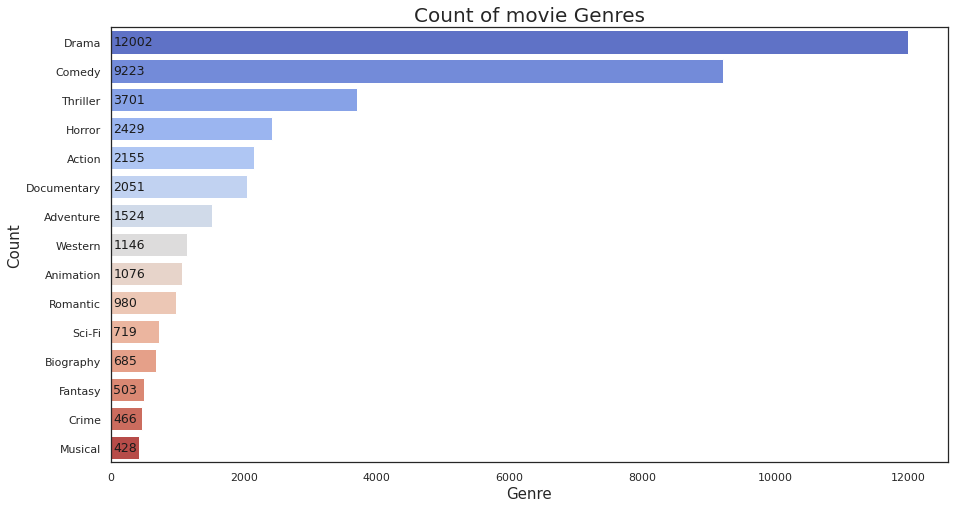

In [8]:
# Count of movie genres
sns.set(style='white')

plt.figure(figsize=(15, 8))
plt.title('Count of movie Genres', size=20)
top15_genres = movies_df['genre'].value_counts()[:15]
ax = sns.barplot(x=top15_genres.values, y=top15_genres.index, palette='coolwarm')
plt.xlabel('Genre', size=15)
plt.ylabel('Count', size=15)
for i, v in enumerate(top15_genres.values):
    plt.text(x=40, y=i+0.12, s=v, color='k', fontsize=12.5)
plt.show()

Plotting an histogram with the count of movies by year of release.

<i>The drop of movies from 2017-18 is due to the fact that the FilmTV dataset only includes the movies with at least one expressed vote (provided by a critic or the public).</i>
<br>
<i>Several recent movies have not been rated yet by any critic or user, and this explains the frequency drop in the last couple of years.</i>

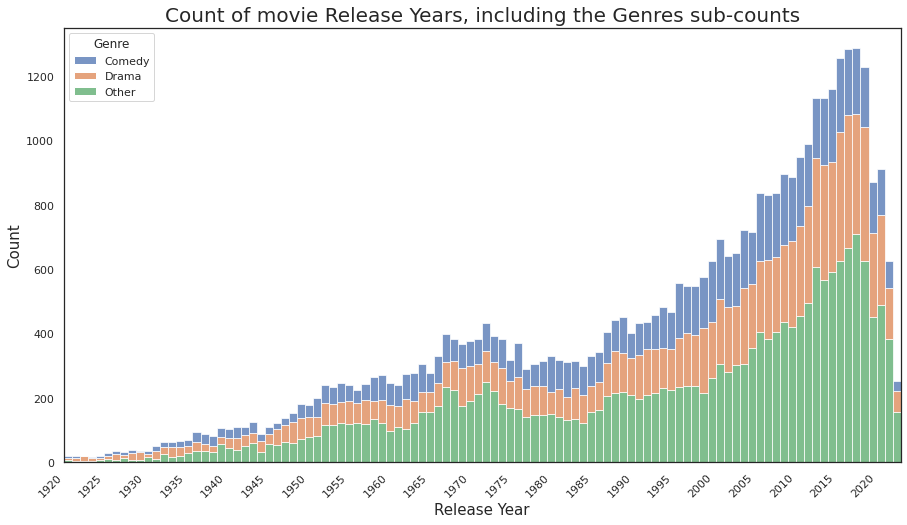

In [9]:
# Count of movies release year
sns.set(style='white')

# simplfying the genre names keeping only the two most common ones ('Drama' and 'Comedy') and naming every other genre 'Other'
top2_genres = movies_df['genre'].value_counts()[:2]
movies_df['generic_genre'] = [x if x in top2_genres.index.tolist() else 'Other' for x in movies_df['genre']]

min_year = 1920
max_year = max(movies_df['year'])

plt.figure(figsize=(15, 8))
plt.title('Count of movie Release Years, including the Genres sub-counts', size=20)
ax = sns.histplot(data=movies_df.sort_values(by='generic_genre', ascending=True), x='year', stat='count', bins=max_year-min_year+1, # each release year has its own bin
                  binrange=(min_year, max_year), hue='generic_genre', multiple='stack')
ax.legend_.set_title('Genre') # setting only the legend title, without specifying the labels (somehow seaborn kept inverting the labels order in the usual legend setup)
ax.margins(x=0)
plt.xlabel('Release Year', size=15)
plt.ylabel('Count', size=15)
plt.xticks(np.arange(min_year, max_year, step=5), rotation=45, ha='right')
plt.show()

Estimating the relative frequency of each movie genre from 1920 until 2021.

<i>The following density plot shows that Comedy movies became more popular decade after decade - but stopped increasing after the 1970s - while Dramas had several fluctuations, but are more popular overall compared to 1920.</i>

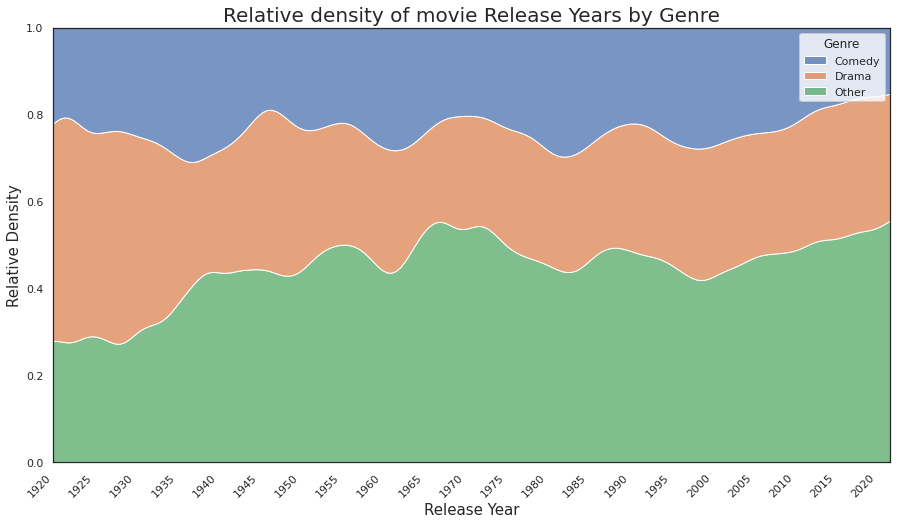

In [10]:
# Relative density of movies release year based on the genre
sns.set(style='white')

plt.figure(figsize=(15, 8))
plt.title('Relative density of movie Release Years by Genre', size=20)
ax = sns.kdeplot(data=movies_df[movies_df['year'].astype('Int32') >= min_year].sort_values(by='generic_genre', ascending=True),
                 x='year', hue='generic_genre', bw_adjust=.5, multiple='fill')
ax.legend_.set_title('Genre') # setting only the legend title, without specifying the labels (somehow seaborn kept inverting the labels order in the usual legend setup)
ax.margins(x=-0.05) # margins in the kdeplot must be slightly negative, otherwise seaborn includes both tails of density
plt.xlabel('Release Year', size=15)
plt.ylabel('Relative Density', size=15)
plt.xticks(np.arange(min_year, max_year, step=5), rotation=45, ha='right')
plt.show()

Visualizing the dispersion of average ratings based on movie genre.

<i>Documentaries are the ones with the highest average ratings and with small dispersion of values, whereas Romantic movies are the ones with the lowest average ratings and the highest dispersion of values.</i>

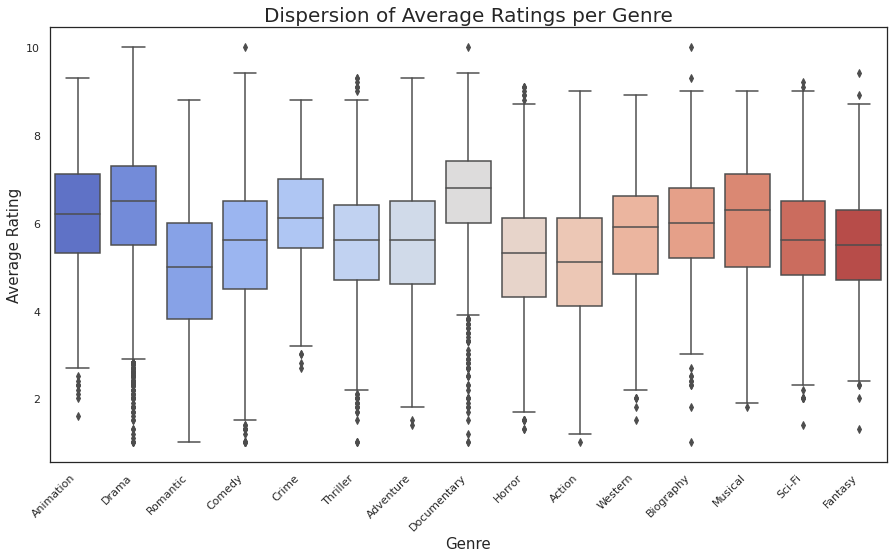

In [11]:
# Dispersion of average ratings based on the genre
sns.set(style='white')
plt.figure(figsize=(15, 8))
plt.title('Dispersion of Average Ratings per Genre', fontsize=20)
ax = sns.boxplot(data=movies_df[movies_df['genre'].isin(movies_df['genre'].value_counts()[:15].index.tolist())], # filtering only the movies with top15 genres
                 x='genre', y='avg_vote', palette='coolwarm')
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()

Additional investigation on the relationship between the average ratings and the most common genres.

The following crosstab allows to see how correlations change from one variable grouping to another.

<i>It becomes evident that Comedies are more often low-rated compared to Dramas.</i>

In [12]:
movies_df['avg_vote_qcut'], qcut_avg_votes = pd.qcut(x=movies_df['avg_vote'], q=3, retbins=True)
avg_vote_labels = ['low (<' + str(qcut_avg_votes[1]) + '/10)',
                   'medium (<' + str(qcut_avg_votes[2]) + '/10)',
                   'high (>=' + str(qcut_avg_votes[2]) + '/10)']
movies_df['avg_vote_qcut'] = pd.qcut(x=movies_df['avg_vote'], q=3, labels=avg_vote_labels)

# Crosstab with the correlations between most common genres and average votes
movie_genres_crosstab = pd.crosstab(
    movies_df[movies_df['genre'].isin(movies_df['genre'].value_counts()[:15].index.tolist())]['genre'], # filtering only the movies with top15 genres
    movies_df[movies_df['genre'].isin(movies_df['genre'].value_counts()[:15].index.tolist())]['avg_vote_qcut'])
movie_genres_crosstab.style.background_gradient(cmap='summer_r')

avg_vote_qcut,low (<5.3/10),medium (<6.5/10),high (>=6.5/10)
genre,,,
Action,1205,603,347
Adventure,666,511,347
Animation,288,362,426
Biography,190,276,219
Comedy,4067,3039,2117
Crime,105,181,180
Documentary,291,609,1151
Drama,2677,3715,5610
Fantasy,221,180,102


Comparing the estimated average ratings based on year of release and broken down by the genre sub-categories.

<i>The interesting finding is that average ratings have been dramatically reduced from the 1920s - where the three major genres were close to each other between the average ratings of 7.5 and 8.0 - and the Drama genre is the only one that has not been considered to get worse decade after decade.</i>

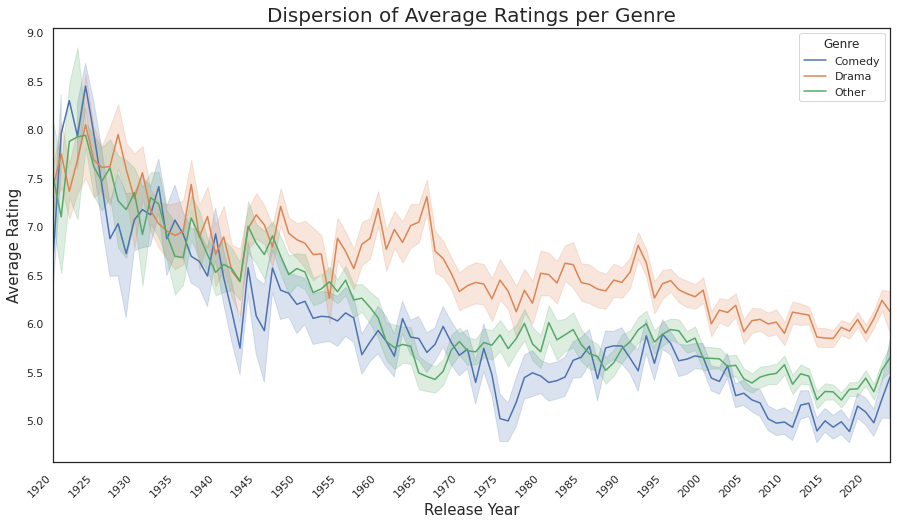

In [13]:
# Estimations of average votes based on release year and broken down by genre name
sns.set(style='white')

plt.figure(figsize=(15, 8))
plt.title('Dispersion of Average Ratings per Genre', fontsize=20)
ax = sns.lineplot(data=movies_df[movies_df['year'].astype('Int32') >= min_year].sort_values(by='generic_genre', ascending=True), x='year', y='avg_vote',
                  ci=85, hue='generic_genre') # ci (Confidence Interval) is reduced from the default 95 so that the bands around the estimations are not too large to spoil the plot
ax.legend_.set_title('Genre') # setting only the legend title, without specifying the labels (somehow seaborn kept inverting the labels order in the usual legend setup)
ax.margins(x=0)
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(np.arange(min_year, max_year, step=5), rotation=45, ha='right')
plt.show()

Creating the WordCloud of descriptions text for the most common 4 genres.

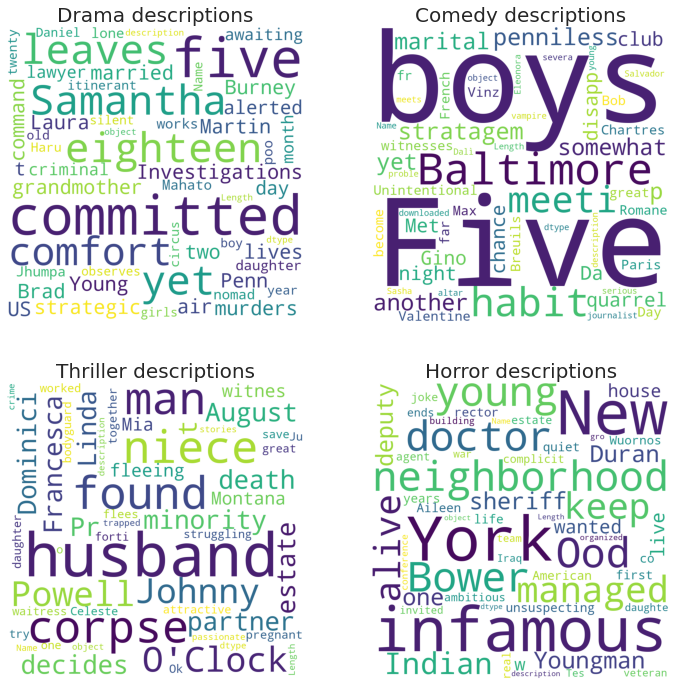

In [14]:
top4_genres = movies_df['genre'].value_counts()[:4]

fig = plt.figure(figsize=(12, 12), facecolor=None)
for i in range(len(top4_genres)):
    ax = fig.add_subplot(2, 2, i+1)
    subset = movies_df[movies_df['genre'] == top4_genres.index[i]]['description']
    plt.title(top4_genres.index[i] + ' descriptions', fontsize=20)
    ax.imshow(WordCloud(width=1000, height=1000, background_color='white', stopwords=set(STOPWORDS),
                        max_words=200, min_font_size=20, random_state=42).generate(str(subset)))
    ax.axis('off')

## <a id='33'>3.3. Duration</a>&ensp;&ensp;&ensp;<a href='#0'>↑</a>

Plotting an histogram with the count of duration categories with bins of 10 minutes each.

<i>Most movies have a duration between 90 and 110 minutes, with Comedies having a higher relative frequency.</i>
<br>
<i>Almost one third of all movies have a duration between 90 and 100 minutes, showing that duration values do not have a high variance (low kurtosis).</i>

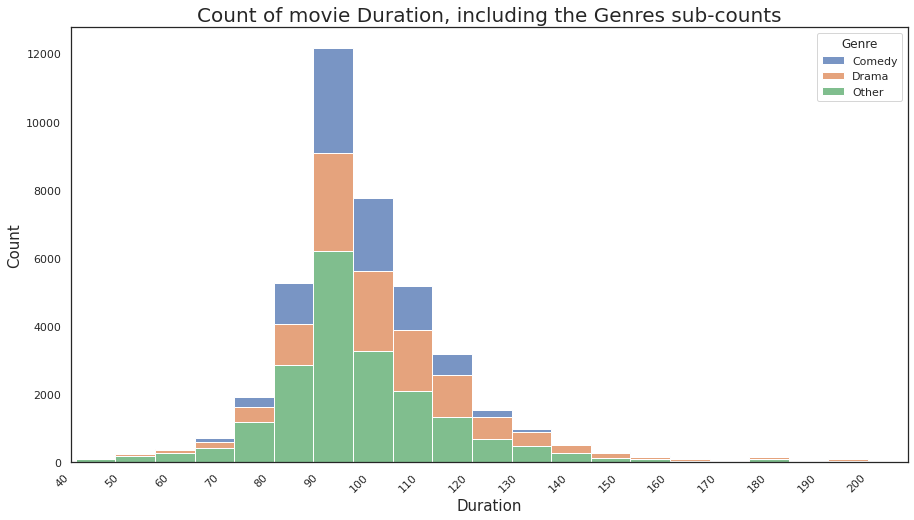

In [15]:
# Count of movies release year
sns.set(style='white')

max_duration = 210

# simplfying the genre names keeping only the two most common ones ('Drama' and 'Comedy') and naming every other genre 'Other'
plt.figure(figsize=(15, 8))
plt.title('Count of movie Duration, including the Genres sub-counts', size=20)
ax = sns.histplot(data=movies_df[movies_df['duration'].astype('Int32') < max_duration].sort_values(by='generic_genre', ascending=True),
                  x='duration', stat='count', bins=int(max_duration/10), hue='generic_genre', multiple='stack')
ax.legend_.set_title('Genre') # setting only the legend title, without specifying the labels (somehow seaborn kept inverting the labels order in the usual legend setup)
ax.margins(x=0)
plt.xlabel('Duration', size=15)
plt.ylabel('Count', size=15)
plt.xticks(np.arange(40, max_duration, step=10), rotation=45, ha='right')
plt.show()

Estimating the relative frequency of duration values, comparing the distribution of durations by genres.

<i>The previous finding about Comedy movies is confirmed, and it is also evident that Dramas tend to be longer than other movie genres.</i>

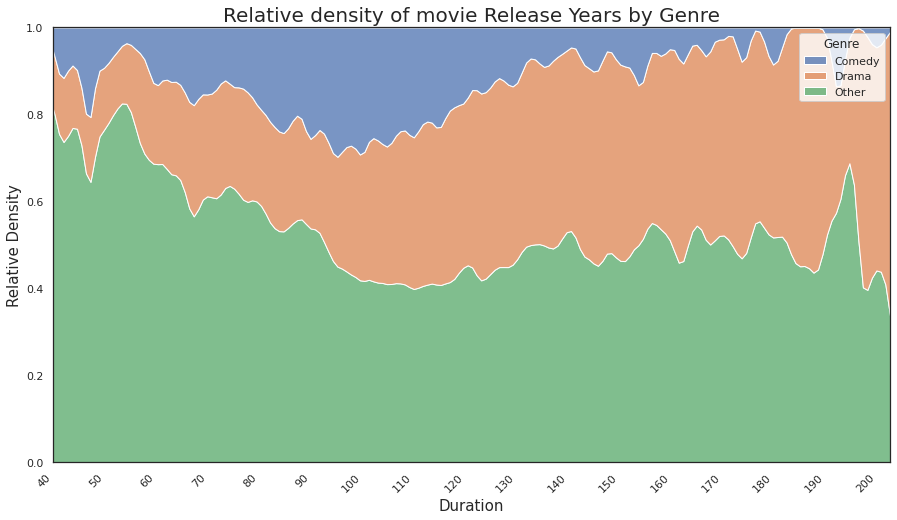

In [16]:
# Relative density of movies release year based on the genre
sns.set(style='white')

plt.figure(figsize=(15, 8))
plt.title('Relative density of movie Release Years by Genre', size=20)
ax = sns.kdeplot(data=movies_df[movies_df['duration'].astype('Int32') < max_duration].sort_values(by='generic_genre', ascending=True),
                 x='duration', hue='generic_genre', bw_adjust=.5, multiple='fill')
ax.legend_.set_title('Genre') # setting only the legend title, without specifying the labels (somehow seaborn kept inverting the labels order in the usual legend setup)
ax.margins(x=-0.05) # margins in the kdeplot must be slightly negative, otherwise seaborn includes both tails of density
plt.xlabel('Duration', size=15)
plt.ylabel('Relative Density', size=15)
plt.xticks(np.arange(40, max_duration, step=10), rotation=45, ha='right')
plt.show()

Additional investigation on the relationship between the average ratings and the duration categories.

<i>Animations, Documentaries, and Horrors have usually very low duration (less than 91 minutes), whereas Biography, Musical, and War movies have the opposite tendency.</i>

In [17]:
movies_df['duration_qcut'], qcut_duration = pd.qcut(x=movies_df['duration'], q=3, retbins=True)
duration_labels = ['short (<' + str(round(qcut_duration[1])) + ' min)',
                   'medium (<' + str(round(qcut_duration[2])) + ' min)',
                   'long (>=' + str(round(qcut_duration[2])) + ' min)']
movies_df['duration_qcut'] = pd.qcut(x=movies_df['duration'], q=3, labels=duration_labels)

# Crosstab with the correlations between most duration categories and average votes
movie_duration_crosstab = pd.crosstab(
    movies_df[movies_df['genre'].isin(movies_df['genre'].value_counts()[:15].index.tolist())]['genre'], # filtering only the movies with top15 genres
    movies_df[movies_df['genre'].isin(movies_df['genre'].value_counts()[:15].index.tolist())]['duration_qcut'])
movie_duration_crosstab.style.background_gradient(cmap='summer_r')

duration_qcut,short (<90 min),medium (<103 min),long (>=103 min)
genre,,,
Action,644,780,731
Adventure,439,553,532
Animation,658,287,131
Biography,73,135,477
Comedy,2845,3872,2506
Crime,122,197,147
Documentary,1190,425,436
Drama,3102,3866,5034
Fantasy,126,165,212


Visualizing the relationship between average votes and duration (in minutes), using a density plot.

<i>Movies with low ratings are generally shorter in duration than the ones more appreciated by the FilmTV users.</i>
<br>
<i>The mode duration is approximately 90 minutes, and the farther the movie duration from the mode, the higher the chance that the movie has been highly rated - although this behaviour is more evident for the right tail of the duration distribution.</i>

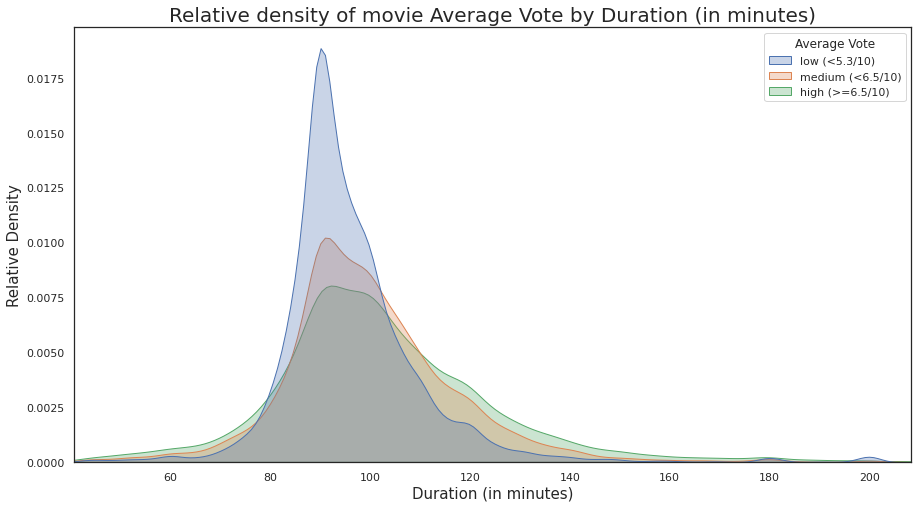

In [18]:
# Relative density of movies release year based on the genre
sns.set(style='white')

qcut_custom_dict = {avg_vote_labels[0]: 0, avg_vote_labels[1]: 1, avg_vote_labels[2]: 2}

plt.figure(figsize=(15, 8))
plt.title('Relative density of movie Average Vote by Duration (in minutes)', size=20)
ax = sns.kdeplot(data=movies_df[movies_df['duration'].astype('Int32') < max_duration].sort_values(
    by=['avg_vote_qcut'], key=lambda x: x.map(qcut_custom_dict), ascending=True), # sorting records based on 'avg_vote_qcut', with 'low' values followed by 'medium' and 'high'
                 x='duration', hue='avg_vote_qcut', fill=True, alpha=0.3)
ax.legend_.set_title('Average Vote') # setting only the legend title, without specifying the labels (somehow seaborn kept inverting the labels order in the usual legend setup)
ax.margins(x=-0.05) # margins in the kdeplot must be slightly negative, otherwise seaborn includes both tails of density
plt.xlabel('Duration (in minutes)', size=15)
plt.ylabel('Relative Density', size=15)
plt.show()

Comparing the estimated average votes based on year of release and broken down by the duration sub-categories.

<i>One interesting finding is that, from the 1920s to the 1940s, movies with medium duration (between 91 and 102 minutes) have experienced a large fluctuation of averag ratings, which was probably partially caused also by the low frequency of medium-duration movies one century ago: at that time, most movies were short.</i>
<br>
<i>Another remarkable finding is that, after the rating drops of short and medium-duration movies from the 1940s until the 1980s, their average rating increased in the next two decades, reaching the same value as the long movies (at least 103 minutes of duration).</i>

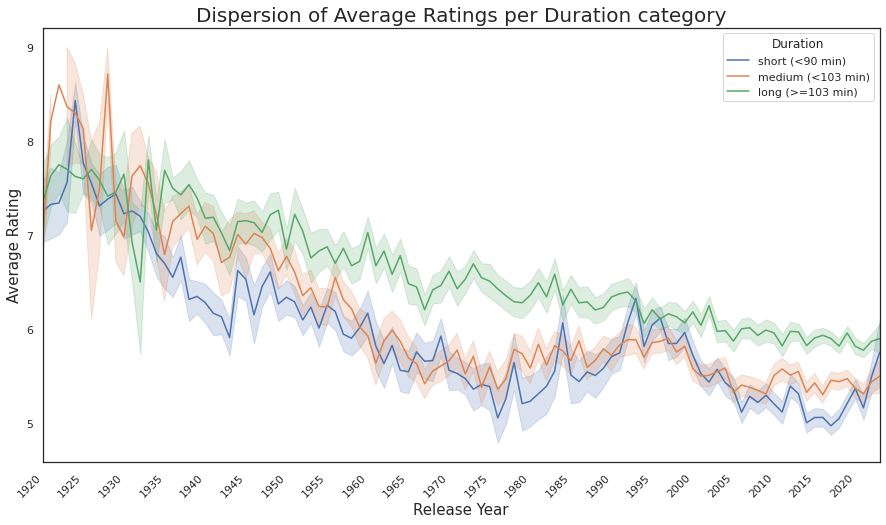

In [19]:
# Estimations of average votes based on release year and broken down by genre name
sns.set(style='white')

plt.figure(figsize=(15, 8))
plt.title('Dispersion of Average Ratings per Duration category', fontsize=20)
ax = sns.lineplot(data=movies_df[(movies_df['year'].astype('Int32') >= min_year) & (movies_df['duration'].astype('Int32') < max_duration)].sort_values(
    by='duration_qcut', ascending=True), x='year', y='avg_vote',
                  ci=85, hue='duration_qcut') # ci (Confidence Interval) is reduced from the default 95 so that the bands around the estimations are not too large to spoil the plot
ax.legend_.set_title('Duration') # setting only the legend title, without specifying the labels (somehow seaborn kept inverting the labels order in the usual legend setup)
ax.margins(x=0)
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(np.arange(min_year, max_year, step=5), rotation=45, ha='right')
plt.show()

Creating the WordCloud of descriptions text for the 3 duration categories.

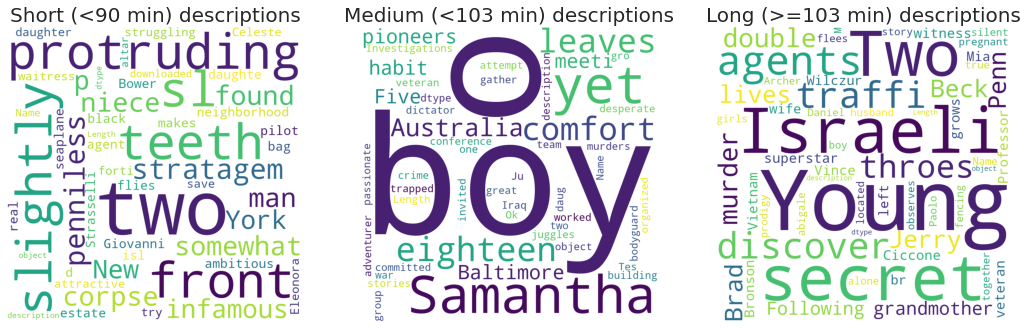

In [20]:
fig = plt.figure(figsize=(18, 6), facecolor=None)
for i in range(len(duration_labels)):
    ax = fig.add_subplot(1, 3, i+1)
    subset = movies_df[movies_df['duration_qcut'] == duration_labels[i]]['description']
    plt.title(duration_labels[i].capitalize() + ' descriptions', fontsize=20)
    ax.imshow(WordCloud(width=1000, height=1000, background_color='white', stopwords=set(STOPWORDS),
                        max_words=200, min_font_size=20, random_state=42).generate(str(subset)))
    ax.axis('off')

## <a id='34'>3.4. Countries</a>&ensp;&ensp;&ensp;<a href='#0'>↑</a>

Collecting the country codes from the Wikipedia website - required to display the country locations with *plotly*

In [21]:
# collecting the country codes from Wikipedia
country_codes_url = 'https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes'
country_codes_html = requests.get(country_codes_url, timeout=20)
country_codes_tree = html.fromstring(country_codes_html.text)
country_tags = country_codes_tree.xpath('//table[contains(@class,"wikitable sortable")]/tbody/tr')
country_codes_dict = {}
for country_tag in country_tags:
    try:
        country_name = country_tag.xpath('./td/a')[0].text.split('(', 1)[0].split(',', 1)[0].strip(' \t')
        country_code = country_tag.xpath('./td/a[contains(@href,"alpha-3")]/span[@class="monospaced"]')[0].text
    except IndexError:
        continue
    country_codes_dict[country_name] = country_code
country_codes_dict['United Kingdom'] = country_codes_dict.pop('United Kingdom of Great Britain and Northern Ireland')
    
# fixing some country names incorrectly translated with TextBlob during the translation from Italian to English (cleaning process required before loading the dataset on Kaggle)
movies_df['country'].replace({'Brasil': 'Brazil', # apologies for this error in the dataset, I missed that
                              'England': 'United Kingdom', 'Great Britain': 'United Kingdom'}, regex=True, inplace=True)

# unnesting the country names for the movies that have been filmed in more than one country
unnested_countries_df = movies_df.assign(country_name=movies_df['country'].str.split(',')).explode('country_name')
unnested_countries_df['country_name'] = unnested_countries_df['country_name'].str.strip(' \t')
unnested_countries_df = unnested_countries_df[(unnested_countries_df['country_name'] != '') & (unnested_countries_df['country_name'].notnull())]

# manual replacement of some countries that do not correspond to the names on Wikipedia
unnested_countries_df['country_name'].replace({
    'Czech Republic': 'Czechia', 'Russia': 'Russian Federation', 'East Germany': 'Germany',
    'West Germany': 'Germany', 'United States': 'United States of America', 'Vatican City': 'Holy See',
    'Vietnam': 'Viet Nam', 'Syria': 'Syrian Arab Republic', 'Macedonia': 'North Macedonia', 'Macau': 'Macao',
    'Republic of the Congo': 'Congo', 'Ivory Coast': "Côte d'Ivoire", 'Laos': "Lao People's Democratic Republic",
    'Principality of Monaco': 'Monaco', 'Turkey': 'Türkiye'}, regex=True, inplace=True)

# aggregating the data to find insights from the FilmTV dataset
agg_countries_df = unnested_countries_df.groupby('country_name').agg(
    movies_count=pd.NamedAgg(column='filmtv_id', aggfunc=np.size),
    mean_rating=pd.NamedAgg(column='avg_vote', aggfunc=np.mean),
    median_rating=pd.NamedAgg(column='avg_vote', aggfunc=np.median),
    mean_total_ratings=pd.NamedAgg(column='total_votes', aggfunc=np.mean),
    sum_total_ratings=pd.NamedAgg(column='total_votes', aggfunc=np.sum),
    mean_duration=pd.NamedAgg(column='duration', aggfunc=np.mean),
    median_duration=pd.NamedAgg(column='duration', aggfunc=np.median)
).reset_index(level=0)

# mapping the country codes taken from Wikipedia, as they are required by the plotly for the geographical visualizations
# The Korean countries cannot be automatically mapped due duplicate names on Wikipedia. Therefore the country_codes_dict is manually amended
country_codes_dict['North Korea'] = 'PRK'
country_codes_dict['South Korea'] = 'KOR'
agg_countries_df['country_code'] = agg_countries_df['country_name'].map(country_codes_dict)
agg_countries_df.sort_values(by='movies_count', ascending=False, inplace=True)

country_names_to_replace = set([x for x in unnested_countries_df['country_name'] if x not in [x for x in country_codes_dict.keys()]])
print(str(len(country_names_to_replace)) + ' countries not in the Wikipedia list:')
print(sorted([str(x) for x in country_names_to_replace]))

# agg_countries_df.head(5)

6 countries not in the Wikipedia list:
['Czechoslovakia', 'Gilbert and Ellice Islands', 'Kosovo', 'Netherlands Antilles', 'Soviet Union', 'Yugoslavia']


Displaying the country locations based on the movies count.

<i>Without any surprise, the country where the highest amount of movies have been filmed is the United States of America.</i>

In [22]:
fig = px.choropleth(data_frame=agg_countries_df, locations='country_code', color='movies_count', hover_name='country_name',
                    color_continuous_scale='Viridis', projection='natural earth')
fig.update_layout(title='Count of countries based on movie locations', title_x=0.5, margin={'r':0, 'l':0, 'b':0, 'pad':0})
fig.show()

Repeating the same visualization, but including only the European countries.

<i>It is also not a surprise that the European country where the highest amount of movies have been filmed is Italy - after all, FilmTV is an Italian website and several movies and comments posted relate to Italian films.</i>
<br>
<i>The other countries highlighted in the plot below are respectively France, UK, Germany, and Spain.</i>

In [23]:
fig = px.choropleth(data_frame=agg_countries_df[~agg_countries_df['country_name'].isin(['United States of America'])], # removing the most common country (USA)
                    locations='country_code', color='movies_count', hover_name='country_name',
                    scope='europe', color_continuous_scale='Viridis', projection='natural earth')
fig.update_layout(title='Count of European countries based on movie locations', title_x=0.5, margin={'r':0, 'l':0, 'b':0, 'pad':0})
fig.show()

Visualizing the relationship between the movies count and the mean and median ratings per country.

<i>Countries were fewer movies were shot have higher ratings, and, given that older movies had higher votes expressed on FilmTV, it is understandable to see two former country names such as Czechoslovakia and Soviet Union being the ones with the highest mean and median ratings overall.</i>
<br>
<i>Italy has worse movie ratings compared to other countries with similar n. of movies (e.g. France and Germany) and this might be due to the overrepresentation of some trash movies that do not even appear on FilmTV for other countries, or might be due to Italians' bias in favour of foreign movies.</i>
<br>
<i>In other words, FilmTV has several more Italian movies on the website compared to other similar countries as (France, Germany, etc.), but they are perceived by the critics and users to be worse in quality.</i>

In [24]:
# Bubble plot with the relationship between movies_count and mean (y-axis) and median (marker size) ratings
filtered_agg_countries_df = agg_countries_df[agg_countries_df['movies_count'] > 35]

fig = go.Figure(data=go.Scatter(x=filtered_agg_countries_df['movies_count'], y=filtered_agg_countries_df['mean_rating'],
                                mode='markers+text',
                                marker=dict(size=filtered_agg_countries_df['median_rating']**2, color=filtered_agg_countries_df['median_rating']),
                                text=filtered_agg_countries_df['country_name'], textposition='top center', textfont=dict(size=9),
                                customdata=filtered_agg_countries_df['median_rating'],
                                hoverlabel=dict(namelength=0), # removes the trace number off to the side of the tooltip box
                                hovertemplate='%{text}:<br>%{x:.0f} movies<br>%{y:.2f} mean rating<br>%{customdata:.2f} median rating'))
fig.update_layout(title='Mean Rating based on Movies Count (log) for each country', template='plotly_white',
                  title_x=0.5, legend=dict(yanchor='bottom', y=-0.15, xanchor='left', x=0, font=dict(size=10), orientation='h'),
                  autosize=False, width=800, height=500)
fig.update_xaxes(type='log')
fig['layout']['xaxis']['title'] = 'Movies Count (log)'
fig['layout']['yaxis']['title'] = 'Mean Rating'
fig.show()

Interactions between Duration categories and Mean Rating for the most 8 most popular countries.

<i>The mean ratings tend to be low for movies with short and medium duration, while ratings are significantly higher for long movies (>= 104 minutes).</i>
<br>
<i>The only countries where ratings linearly increase depending on the duration are Japan, Germany, and Canada.</i>

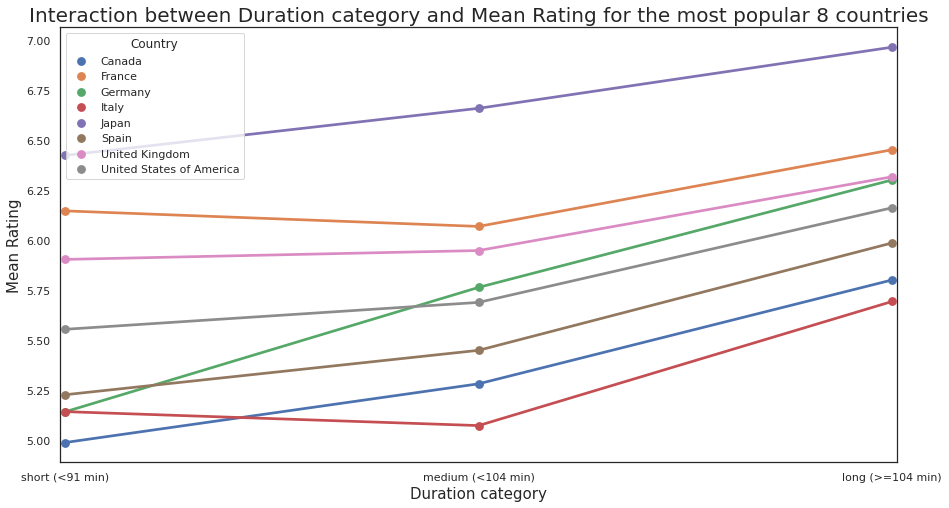

In [25]:
# aggregating the data grouping the dataframe with 'country_name' and 'duration_qcut'
unnested_countries_df['duration_qcut'], qcut_duration = pd.qcut(x=unnested_countries_df['duration'], q=3, retbins=True)
unnested_duration_labels = ['short (<' + str(round(qcut_duration[1])) + ' min)',
                            'medium (<' + str(round(qcut_duration[2])) + ' min)',
                            'long (>=' + str(round(qcut_duration[2])) + ' min)']
unnested_countries_df['duration_qcut'] = pd.qcut(x=movies_df['duration'], q=3, labels=unnested_duration_labels)

agg_countries_duration_df = unnested_countries_df.groupby(['country_name', 'duration_qcut']).agg(
    movies_count=pd.NamedAgg(column='filmtv_id', aggfunc=np.size),
    mean_rating=pd.NamedAgg(column='avg_vote', aggfunc=np.mean),
    median_rating=pd.NamedAgg(column='avg_vote', aggfunc=np.median),
    mean_total_ratings=pd.NamedAgg(column='total_votes', aggfunc=np.mean),
    sum_total_ratings=pd.NamedAgg(column='total_votes', aggfunc=np.sum)
).reset_index()
agg_countries_duration_df = agg_countries_duration_df[agg_countries_duration_df['country_name'].isin(agg_countries_df[:8]['country_name'].tolist())]

# Pointplot to show the interaction between Duration category and Mean Rating
plt.figure(figsize=(15, 8))
plt.title('Interaction between Duration category and Mean Rating for the most popular 8 countries', fontsize=20)
ax = sns.pointplot(data=agg_countries_duration_df, x='duration_qcut', y='mean_rating', hue='country_name')
ax.legend_.set_title('Country') # setting only the legend title, without specifying the labels (somehow seaborn kept inverting the labels order in the usual legend setup)
ax.margins(x=0.006)
plt.xlabel('Duration category', fontsize=15)
plt.ylabel('Mean Rating', fontsize=15)
plt.show()

# <a id='4'>4. Key Findings</a>&ensp;&ensp;&ensp;<a href='#0'>↑</a>

<div class="alert alert-block alert-info" style="font-size:14px">
<p>
🔑 <b>Top Movies</b>:
<li><i>Pulp Fiction</i> and <i>The Shining</i> are the most popular movies</li>
<li>Dramas are the movie genre most frequent among the top 100 movies based on total votes</li>
<li>The decade 2000-10 is the most frequent decade of release for the top 100 movies</li>
<li>There is no movie in top 100 that has been released from the beginning of the year 2020 (which was not obvious given that the FilmTV dataset was scraped on 2021-09-10)</li>
<li>The mean rating of the top 100 movies descreased decade after decade, with the most evident drop in perceived quality occured in the decade 2000-10</li>
</p>
<br>
<p>🔑 <b>Genres</b>:
<li>Dramas and Comedies are the most popular genres overall</li>
<li>The count of movies based on release year has increased over time, but has dropped since the year 2017</li>
<li>Comedies became more popular decade after decade - but stopped increasing after the 1970s - while Dramas had several fluctuations, but are more popular overall compared to the 1920s</li>
<li>Documentaries have the highest average ratings and with small dispersion of values, whereas Romantic movies are the ones with the lowest average ratings and the highest dispersion of values</li>
<li>Comedies are more often low-rated than Dramas</li>
<li>Average ratings dropped over time for all genres, but Dramas experienced the lowest ratings reduction</li>
</p>
<br>
<p>🔑 <b>Duration</b>:
<li>Most movies have a duration between 90 and 110 minutes</li>
<li>Comedies are extremely frequent for the duration range between 90 and 100 minutes, while Dramas tend to be longer than the other genres</li>
<li>Animations, Documentaries, and Horrors have usually very low duration (less than 91 minutes), whereas Biography, Musical, and War movies have the opposite tendency</li>
<li>Movies with low ratings are generally shorter in duration</li>
<li>The mode duration is approximately 90 minutes, and the farther the movie duration from the mode the higher the chance that the movie has been highly rated</li>
<li>After the rating drops of short and medium-duration movies from the 1940s until the 1980s, their average rating increased in the next two decades, reaching the same value as the long movies (at least 103 minutes of duration)</li>
</p>
<br>
<p>🔑 <b>Countries</b>:
<li><i>United States of America</i> is the country where most movies have been filmed, followed by <i>Italy</i>, <i>France</i>, <i>United Kingdom</i>, <i>Germany</i>, and <i>Spain</i></li>
<li>Countries where fewer movies were shot have higher ratings, and, given that older movies had higher votes expressed on FilmTV, it makes sense that the ones with the highest mean rating are the former countries <i>Czechoslovakia</i> and <i>Soviet Union</i></li>
<li>Italy has movie ratings far worse compared to other countries with similar n. of movies, allowing to assume that FilmTV overrepresents trash movies that do not even appear for other countries, or that Italian are biased in favour of foreign movies</li>
<li>The mean ratings tend to be low for movies with short and medium duration, while ratings are significantly higher for long movies (at least 104 minutes)</li>
<li>The only countries where ratings linearly increase depending on the duration are Japan, Germany, and Canada</li>
</p>
</div>